# Task 1
## Predict the missing data in these two features. Discuss your results.

**An example of how you can solve the task**

*Leonardo Portes, 2022-11-10*

---


Some remarks before we start: 

**A. Exploratory style of this notebook**

This notebook was written to support the step-by-step discussion on Day10 (Data Fusion sandbox) and to highlight some specific points. 



**B. Use of narrative text along with coding**

It is good practice to collect information about your data and your project and then include it in your Jupyter notebook. In this example, I've:

* Copied and pasted information from the file "Data Description.docx"

* Increased the clarity and information flow by:
    * adding bullet points
    * splitting the paragraph into meaningful segments. 


 

---


## INFO
 
**Information from the file Data Description.docx.** 

The data set is a set of petrophysical well logs from a deep offshore gas exploration well, Iago-1, from the Northwest Shelf of Australia. The complete well dataset is publically available in the form of Log ASCII STANARD (.LAS) files at no cost from the publicly available WAPIMS (Western Australian Petroleum and Geothermal Information Management System) database. 

Six petrophysical measurements were chosen from the well that record changes in:
* density (RHOZ)
* electrical resistivity (HART)
* sonic velocity (DTCO)
* natural radioactivity (ECGR)
* mean atomic number (PEFZ) 
* porosity of the rocks penetrated by the well (TNPH).

These six logs are typically the most important and commonly acquired petrophysical measurements used in offshore oil and gas exploration wells. 

In addition, a **geological manual domaining** is provided. 

The data set is not perfect as:
1. two features were not completely recorded, and their logs include missing data.
2. the layer boundaries have been determined manually and need to identify their accuracy and certainties:

In [1]:
# Standard libraries
import numpy as np  # written in C, is faster and robust library for numerical and matrix operations
import pandas as pd # data manipulation library, it is widely used for data analysis and relies on numpy library.
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # plot nicely =)

from sklearn.model_selection import train_test_split #split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance

# Auxiliar functions
from utils import *

# the following to lines will tell to the python kernel to always update the kernel for every utils.py
# modification, without the need of restarting the kernel.
%load_ext autoreload
%autoreload 2

# using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code
%matplotlib inline

## Load data

Here we load the data set and discover that it needs some manipulation: 
* remove the first row, which contains a string with the physical unit. 
* change types from *object* to *float*

**Remark**: you will probably need to change the relative path below to match the location where you store your data in respect with the location of this notebook. If you put them in the same folder, just change to 
```
load_path = r"./"
```

In [4]:
load_path = r"../data/Petrophysical/"
load_file = "Regression_task1_Petrophysical_data.csv"

df = pd.read_csv(load_path+load_file)

df

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
0,M,us/ft,gAPI,ohm.m,B/E,g/cm3,m3/m3,NaN
1,2207.057,73.166,36.884,2.016,4.214,2.437,0.149,1.0
2,2207.209,74.623,39.817,1.821,4.212,2.438,0.156,1.0
3,2207.362,74.979,42.094,1.758,4.182,2.434,0.163,1.0
4,2207.514,73.891,39.149,1.7,4.088,2.429,0.171,1.0
...,...,...,...,...,...,...,...,...
5715,3077.87,Nan,143.098,0.707,3.133,2.351,Nan,10.0
5716,3078.023,Nan,146.562,0.729,3.213,2.326,Nan,10.0
5717,3078.175,Nan,148.03,0.654,3.262,2.316,Nan,10.0
5718,3078.328,Nan,146.121,0.624,3.304,2.303,Nan,10.0


Let's have a deeper look on the data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5720 entries, 0 to 5719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEPTH            5720 non-null   object 
 1   DTCO             5720 non-null   object 
 2   ECGR             5720 non-null   object 
 3   HART             5720 non-null   object 
 4   PEFZ             5720 non-null   object 
 5   RHOZ             5720 non-null   object 
 6   TNPH             5720 non-null   object 
 7   Gelogical layer  5719 non-null   float64
dtypes: float64(1), object(7)
memory usage: 357.6+ KB


In [46]:
df.describe()

,Gelogical layer
count,5719.000000
mean,4.796468
std,3.037284
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


Note that only the column **Gelogical layer** appears in the ouput of describe. Below we find why: the "numbers" were loaded as *objects*, not as a proper representation of numbers (ie, as *floats*). 

In [7]:
df.dtypes

DEPTH               object
DTCO                object
ECGR                object
HART                object
PEFZ                object
RHOZ                object
TNPH                object
Gelogical layer    float64
dtype: object

We need to change two things in the dataset: 

1. Let's start by removing the first row, which contains physical units (not data). 

2. Then, we will change the dtypes from *objects* to *floats*.

In [8]:
df.drop(index=0, inplace=True)

# double-checking: 
df

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
1,2207.057,73.166,36.884,2.016,4.214,2.437,0.149,1.0
2,2207.209,74.623,39.817,1.821,4.212,2.438,0.156,1.0
3,2207.362,74.979,42.094,1.758,4.182,2.434,0.163,1.0
4,2207.514,73.891,39.149,1.7,4.088,2.429,0.171,1.0
5,2207.666,74.385,36.679,1.641,3.98,2.421,0.172,1.0
...,...,...,...,...,...,...,...,...
5715,3077.87,Nan,143.098,0.707,3.133,2.351,Nan,10.0
5716,3078.023,Nan,146.562,0.729,3.213,2.326,Nan,10.0
5717,3078.175,Nan,148.03,0.654,3.262,2.316,Nan,10.0
5718,3078.328,Nan,146.121,0.624,3.304,2.303,Nan,10.0


In [49]:
# Count non-NA cells for each column

df.count()

DEPTH              5719
DTCO               5719
ECGR               5719
HART               5719
PEFZ               5719
RHOZ               5719
TNPH               5719
Gelogical layer    5719
dtype: int64

Now we can change the data from *object* to *float*. 

In [12]:
df = df.astype("float")

In [13]:
df.dtypes

DEPTH              float64
DTCO               float64
ECGR               float64
HART               float64
PEFZ               float64
RHOZ               float64
TNPH               float64
Gelogical layer    float64
dtype: object

Now that they are *floats*, note how the count of Nan values completely changes!

In [14]:
# Count non-NA cells for each column

df.count()

DEPTH              5719
DTCO               5261
ECGR               5719
HART               5719
PEFZ               5719
RHOZ               5719
TNPH               5371
Gelogical layer    5719
dtype: int64

Now, because everything is float, the output of describe must show all columns. 

In [15]:
df.describe()

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
count,5719.0000,5261.000000,5719.000000,5719.000000,5719.000000,5719.000000,5371.000000,5719.000000
mean,2642.7684,96.280707,70.515158,1.207609,4.217895,2.442249,0.231107,4.796468
std,251.6242,13.943311,28.823576,0.492866,0.493987,0.060712,0.065163,3.037284
min,2207.0570,65.872000,27.405000,0.474000,2.344000,1.997000,0.086000,1.000000
25%,2424.9125,86.067000,49.196500,0.820000,3.915000,2.409000,0.178000,2.000000
50%,2642.7680,97.597000,65.057000,1.060000,4.222000,2.446000,0.230000,4.000000
75%,2860.6240,107.028000,84.093000,1.493500,4.581000,2.486000,0.273000,8.000000
max,3078.4800,131.885000,160.170000,5.524000,5.766000,2.596000,0.476000,10.000000


---
## Visualisation

Now is the moment to inspect the data set. For example, we can:
* plot as function of the DEPTH. 
* search for correlations. 
* investigate the distribution. 

Below we can verify the information provied on the file**Data Description.docx** that two  features  were not completelly recorded: both DTCO and TNPH are shorter them the other features. 

However, it is a good idea to verify if there are missing values elsewhere. We will do it later. 

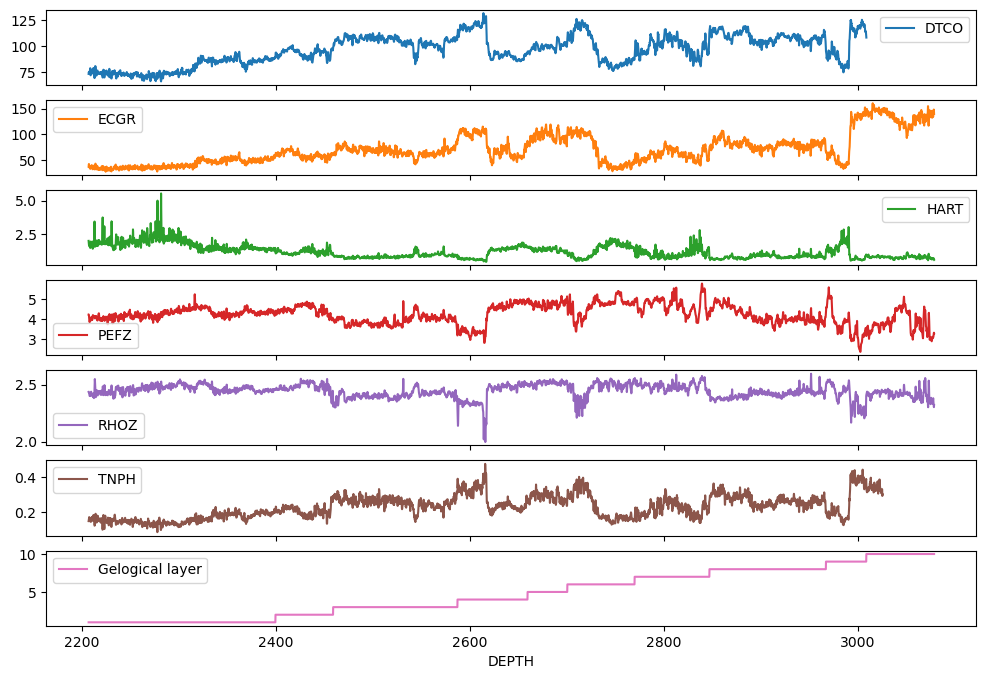

In [16]:
df.plot(x="DEPTH", subplots=True, figsize=(12,8), sharex=True);

---
Below we inspect the correlations. We could use as features only the columns 'DTCO', 'ECGR', 'HART', 'PEFZ', 'RHOZ', 'TNPH' (ie, removing 'DEPTH'. However, in this example we will inspect all correlations. 

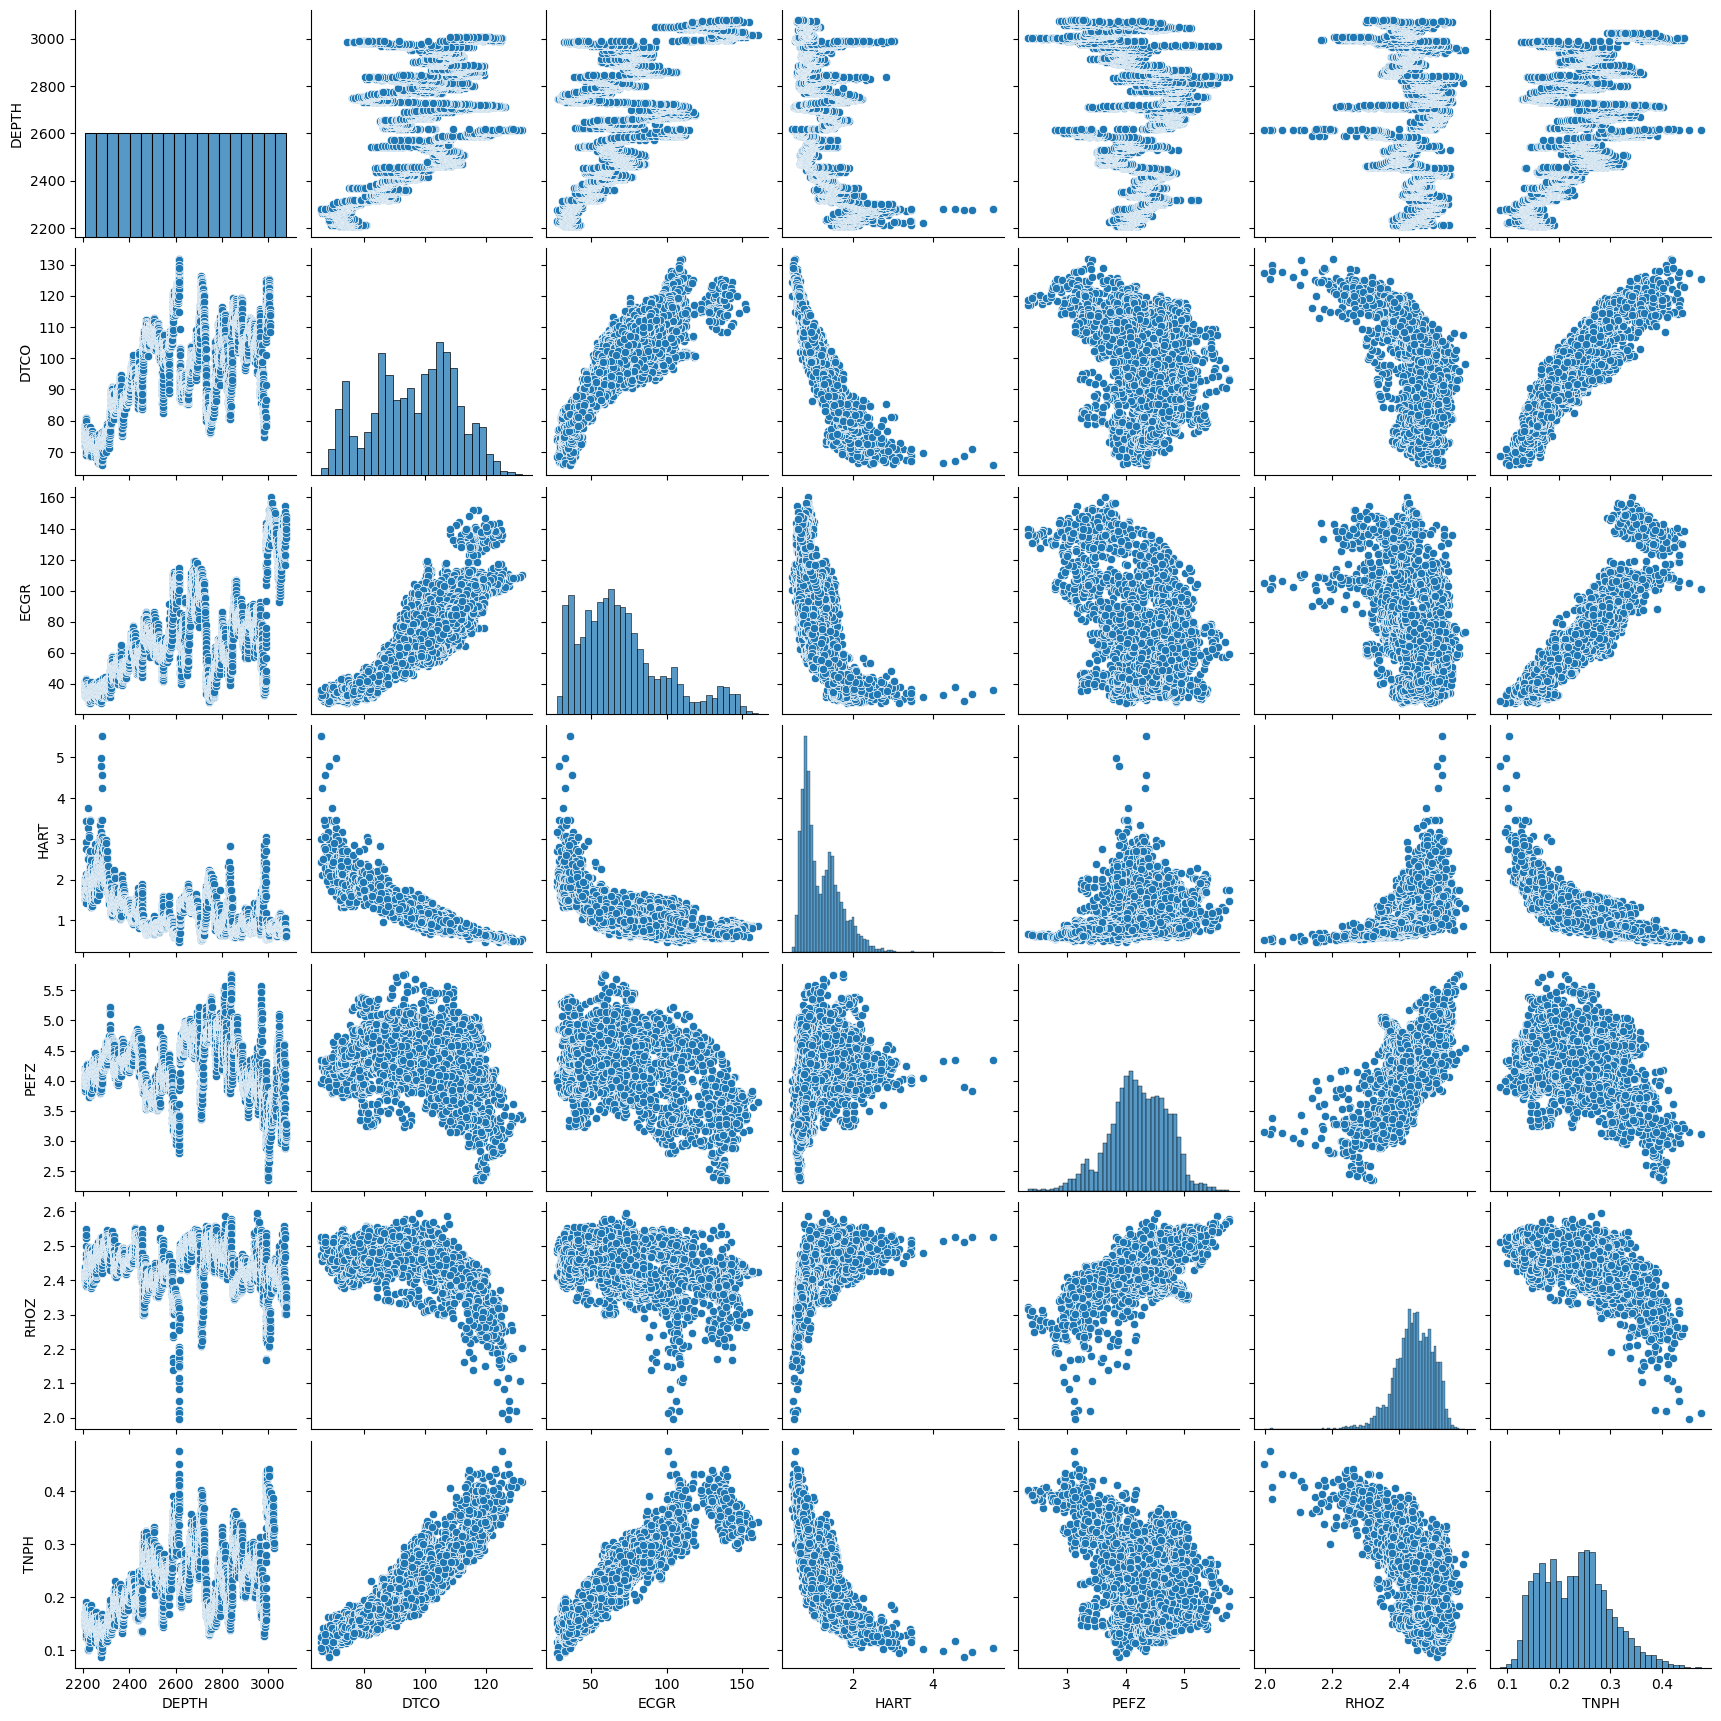

In [17]:
sns.pairplot(df.iloc[:,:-1]); # all columns but the geological classification

Getting the correlation coeficients:

In [18]:
df.corr()

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
DEPTH,1.000000,0.599302,0.661765,-0.527747,-0.112101,-0.179330,0.537114,0.985648
DTCO,0.599302,1.000000,0.863769,-0.906006,-0.335833,-0.575370,0.914245,0.558783
ECGR,0.661765,0.863769,1.000000,-0.675565,-0.389326,-0.439117,0.911411,0.654884
HART,-0.527747,-0.906006,-0.675565,1.000000,0.326352,0.549463,-0.793113,-0.490957
PEFZ,-0.112101,-0.335833,-0.389326,0.326352,1.000000,0.709828,-0.401151,-0.115585
RHOZ,-0.179330,-0.575370,-0.439117,0.549463,0.709828,1.000000,-0.623726,-0.185841
TNPH,0.537114,0.914245,0.911411,-0.793113,-0.401151,-0.623726,1.000000,0.508439
Gelogical layer,0.985648,0.558783,0.654884,-0.490957,-0.115585,-0.185841,0.508439,1.000000


* If you compare the correlations with the the plots as function of the depth, one can see (for example) that ECGR is a good candidate to predict DTCO, while PEFZ is a poor candidate. 


* Remember that the correlation coeficients will inform about **linear** correlations. However, the pair-plot above allows you to visually inspect for **non-linear** correlations!

---

In this example we are not interested on the distribution of the data, but is good practice to inspect the data from all angles! Maybe we will find something relevant. 

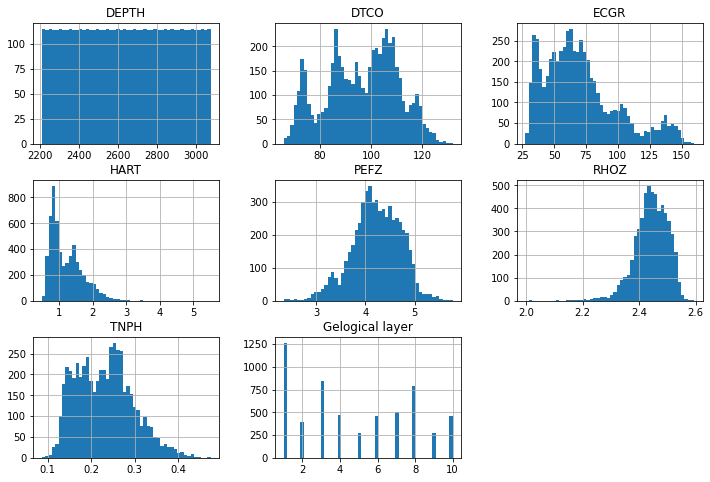

In [57]:
df.hist(bins=50, figsize=(12,8));

### What are the two features with missing values?

* From the plot above, we can see that they are DTCO and TNPH. 
* We cannot rely only on the visual inspection. Let's verify this through Pandas.

Below we can see that the number of non-null values for DTCO (5261) and TNPH (5371) is different from the total length (5719) of the dataset:

In [19]:
print(df.shape)

df.info()

(5719, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719 entries, 1 to 5719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEPTH            5719 non-null   float64
 1   DTCO             5261 non-null   float64
 2   ECGR             5719 non-null   float64
 3   HART             5719 non-null   float64
 4   PEFZ             5719 non-null   float64
 5   RHOZ             5719 non-null   float64
 6   TNPH             5371 non-null   float64
 7   Gelogical layer  5719 non-null   float64
dtypes: float64(8)
memory usage: 357.6 KB


In [20]:
df.tail()

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
5715,3077.870,NaN,143.098,0.707,3.133,2.351,NaN,10.0
5716,3078.023,NaN,146.562,0.729,3.213,2.326,NaN,10.0
5717,3078.175,NaN,148.030,0.654,3.262,2.316,NaN,10.0
5718,3078.328,NaN,146.121,0.624,3.304,2.303,NaN,10.0
5719,3078.480,NaN,139.502,0.611,3.272,2.322,NaN,10.0


So, we have NaN values (ie, the missing data). 

In [21]:
df.isna()

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5715,False,True,False,False,False,False,True,False
5716,False,True,False,False,False,False,True,False
5717,False,True,False,False,False,False,True,False
5718,False,True,False,False,False,False,True,False


Maybe we have only one Nan value in the middle of the data. Let's see if a given column has at least one Nan value:

In [61]:
df.isna().any()

DEPTH              False
DTCO                True
ECGR               False
HART               False
PEFZ               False
RHOZ               False
TNPH                True
Gelogical layer    False
dtype: bool

**Remark**: we could use .isnull() as well. 

In [22]:
df.isnull()

,DEPTH,DTCO,ECGR,HART,PEFZ,RHOZ,TNPH,Gelogical layer
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5715,False,True,False,False,False,False,True,False
5716,False,True,False,False,False,False,True,False
5717,False,True,False,False,False,False,True,False
5718,False,True,False,False,False,False,True,False


In [23]:
df.isnull().any()

DEPTH              False
DTCO                True
ECGR               False
HART               False
PEFZ               False
RHOZ               False
TNPH                True
Gelogical layer    False
dtype: bool

So, now we are **sure** that only DTCO and TNPH have missing values. However, are they only at the end of the data, or are they spread along the depth?

Let's see how to verify this using DTCO as an example. First we get the array with the indexes of the nan values:

In [24]:
temp = np.where(df['DTCO'].isna())[0]
temp

array([5261, 5262, 5263, 5264, 5265, 5266, 5267, 5268, 5269, 5270, 5271,
       5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282,
       5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293,
       5294, 5295, 5296, 5297, 5298, 5299, 5300, 5301, 5302, 5303, 5304,
       5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5313, 5314, 5315,
       5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326,
       5327, 5328, 5329, 5330, 5331, 5332, 5333, 5334, 5335, 5336, 5337,
       5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348,
       5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357, 5358, 5359,
       5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370,
       5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381,
       5382, 5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392,
       5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403,
       5404, 5405, 5406, 5407, 5408, 5409, 5410, 54

Ok, it seems we have nans only at the end. Are this values concecutive? The .diff resulting in 1 will answer this. 

In [25]:
np.diff(temp)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

So, nans only at the end, and they start at the index 5261:

In [26]:
np.where(df['DTCO'].isna())[0][0]

5261

You can run the same as above to inspect TNPH. You will find its nans start at 5371:

In [27]:
np.where(df['TNPH'].isna())[0][0]

5371

---
## Focus on DTCO

* Here we will focus on predicting DTCO. The same steps will apply to TNPH. 

* The first step model trainning and evaluation. For this we use only **known** data. I.e., we cannot train or evaluate a model using Nan!

* The second step is using the model to predict the missing values. 

---
### Model trainning and evaluation

**Remark***: "Naive" approach

Here we will train our model with no assumptions (ie, going straight to the point). In practice, you should avoid that. The goal here is to explore "freely" the concepts and tools from Days 8, 9. 

Specifically we will:

* use all features for prediction (but not depth and layer). It is Ok since we have just a few. However, it would be best to explore what features correlate to your target variable. 

* make a few tests to validate the model (only one test set and performance estimated by mean squared error). It would be best if you considered k-fold validation and other performance metrics. 

Printing all columns names here, just in case you need them latter. 

In [28]:
feat_lbls = df.columns.to_numpy()

feat_lbls

array(['DEPTH', 'DTCO', 'ECGR', 'HART', 'PEFZ', 'RHOZ', 'TNPH',
       'Gelogical layer'], dtype=object)

### Splitting the data into features (x) and target (y)

In [29]:
x = np.copy(df[['ECGR', 'HART', 'PEFZ', 'RHOZ']].values) # features/predictors
y = np.copy(df[['DTCO']].values) # target

print(x.shape, y.shape)

(5719, 4) (5719, 1)


In [30]:
x

array([[ 36.884,   2.016,   4.214,   2.437],
       [ 39.817,   1.821,   4.212,   2.438],
       [ 42.094,   1.758,   4.182,   2.434],
       ...,
       [148.03 ,   0.654,   3.262,   2.316],
       [146.121,   0.624,   3.304,   2.303],
       [139.502,   0.611,   3.272,   2.322]])

In [31]:
y

array([[73.166],
       [74.623],
       [74.979],
       ...,
       [   nan],
       [   nan],
       [   nan]])

Let's use the variable below to store the starting index of nans values for DTCO (we saw before that it is 5261):

In [32]:
dtco_idx = np.where(df['DTCO'].isna())[0][0]

print(dtco_idx)

y[dtco_idx] # Sanity check. The output must be [nan]

5261


array([nan])

As discussed in Day10, we split the dataset into:
1. **known** data: the one we use to develop our ML model (ie, from trainning until testing). 
2. **new** data: when the ML system is put in use, that is the data related to the problem we need to solve.  

In [33]:
# Splitting the Data into "known" for ML dev and "new"
x_known = np.copy(x[:dtco_idx,:])
y_known = np.copy(y[:dtco_idx])

x_new = np.copy(x[dtco_idx:,:])
y_new = np.copy(y[dtco_idx:]) 

print(x_known.shape, y_known.shape)
print(x_new.shape, y_new.shape)

(5261, 4) (5261, 1)
(458, 4) (458, 1)


### Trainning

Note that we must use only the known data for trainning and evaluation!

In [34]:
# Splitting the Data into Train and Test Sets

from sklearn.model_selection import train_test_split #split arrays or matrices into random train and test subsets

# split data train 70% and test 30%. You can try other splits here.
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, 
    random_state=42
)

Remember that we have features with different units... So, normalisation is a must if we are using KNN or SVM (ie, any model that utilizes the concept of distances in the feature space)!

**Remark**: normalisation is not necessary if your planning to use Random Forest. Do you remember why?

In [35]:
from sklearn.preprocessing import StandardScaler 

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(x_train) # not considering the label is_ore; using the training data set!

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

Let's try a KNN regressor. If you want to test other regressors, I recommend to create a copy of this notebook and change the code below. Specifically, avoid to use the same notebook to test different models. 

In [37]:
from sklearn.neighbors import KNeighborsRegressor # as for version 0.22

model = KNeighborsRegressor(n_neighbors=3) # considering k=3    

model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

At this point we should look for the best model (see **week-08** and **week-09**) before using the test data. This is left for you as an exercise for the future.

So, assuming we already have the best model, let's see his performance using the test data. We will inspect the performance in different ways. I call your attention to the **visual comparisson**!

In [38]:
y_pred = model.predict(x_test_scaled) 
y_pred = y_pred.ravel()

We can perform a visual comparison between the test set (ground thruth) and the model prediction. 

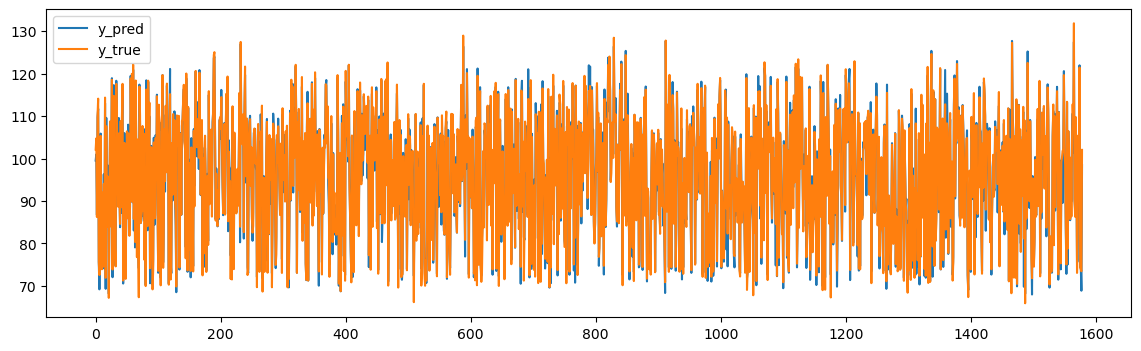

In [40]:
df_res = pd.DataFrame({"y_pred": y_pred, 
                       "y_true":y_test.ravel()}
                     )

df_res.plot(figsize=(14,4));

Visually (ie, qualitatively), the prediction looks great!

Now, let's compare them quantitatively. It is a good moment to ask advise from the expert in the field. Suppose that the advise was to use the mean squared error. 

In [41]:
from sklearn.metrics import mean_squared_error 

print("Mean Square Error: ", mean_squared_error(y_test, y_pred))


Mean Square Error:  5.248409288508903


Is the MSE above good? 

You may compare this value with the range of the data. I'll give you another interesting way to test if this value is good: how does it compare with a random "regressor"?

In [42]:
y_rnd = np.copy(y_test.ravel()) 

np.random.shuffle(y_rnd)  # inplace operation

print("Mean Square Error: ", mean_squared_error(y_test, y_rnd))

Mean Square Error:  395.1035363229892


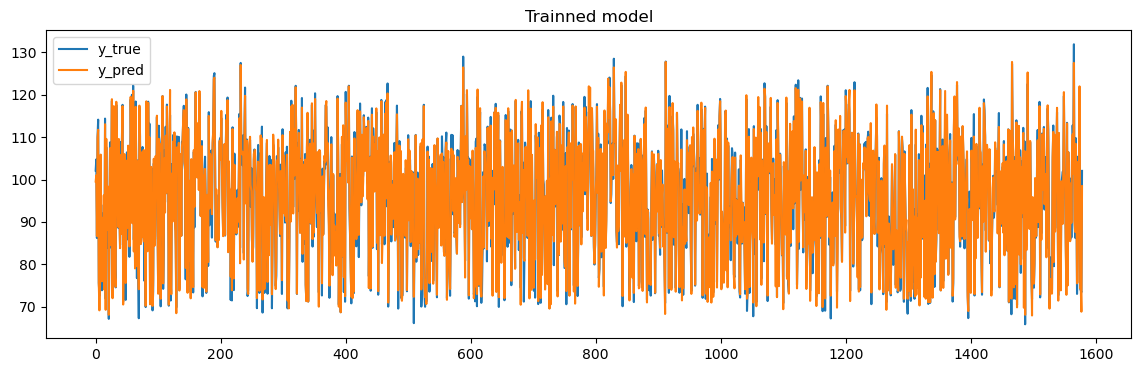

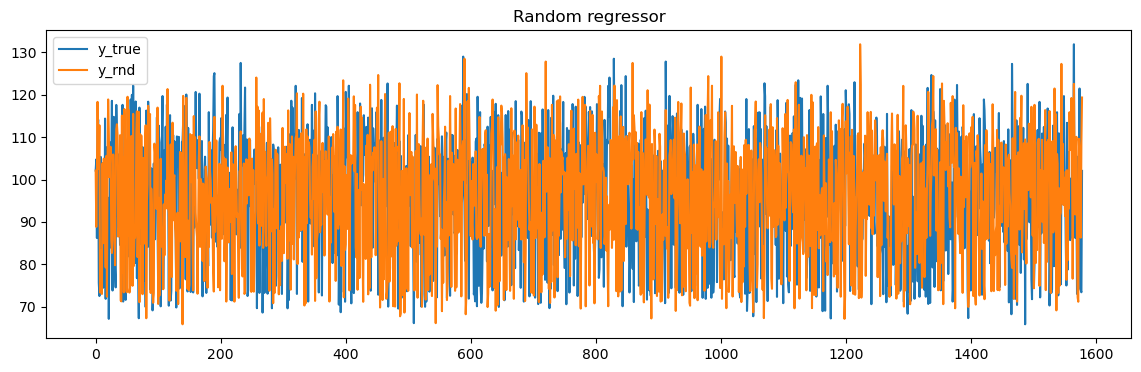

In [45]:
df_res["y_rnd"] = y_rnd

df_res[["y_true","y_pred"]].plot(figsize=(14,4), 
                                 title="Trainned model");

df_res[["y_true","y_rnd"]].plot(figsize=(14,4),
                               title="Random regressor");


Our model seems to be working well. But remember, you can perform other tests and use an interactive plot to zoom in into the comparative plots. 

--
## Predicting the missing values

If you are satisfied with the model performance, you can now "productionise" your model and use it to predict the missing values.



In [46]:
y_new.ravel()[:10] # just remembering here that y_new is just an array of nans

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

We need to normalise the features with the same parameters used in trainning.

In [47]:
x_new_scaled = scaler.transform(x_new)

Now, let's predict!

In [48]:
y_new_pred = model.predict(x_new_scaled)
y_new_pred = y_new_pred.ravel()

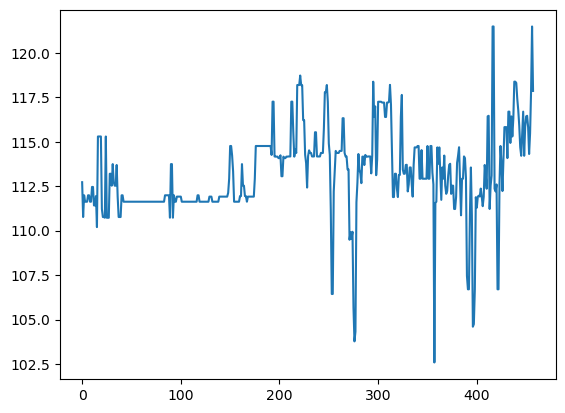

In [50]:
plt.plot(y_new_pred);

Just to make plotting easy, we will replace the nans of DTCO with the predicted values. 

In [54]:
dtco_idx

5261

In [55]:
df["DTCO"].iloc[dtco_idx:]

5262   NaN
5263   NaN
5264   NaN
5265   NaN
5266   NaN
        ..
5715   NaN
5716   NaN
5717   NaN
5718   NaN
5719   NaN
Name: DTCO, Length: 458, dtype: float64

In [56]:
df["DTCO"].iloc[dtco_idx:] = np.copy(y_new_pred)

# double-checking
df["DTCO"].iloc[dtco_idx:]

5262    112.722333
5263    110.766333
5264    111.986667
5265    111.626000
5266    111.626000
           ...    
5715    114.308000
5716    115.481333
5717    117.853000
5718    121.474333
5719    117.853000
Name: DTCO, Length: 458, dtype: float64

In the plot below, compare the predicted DTCO with ECGR (they seems "visualy" to be righly correlated). The prediction looks good!

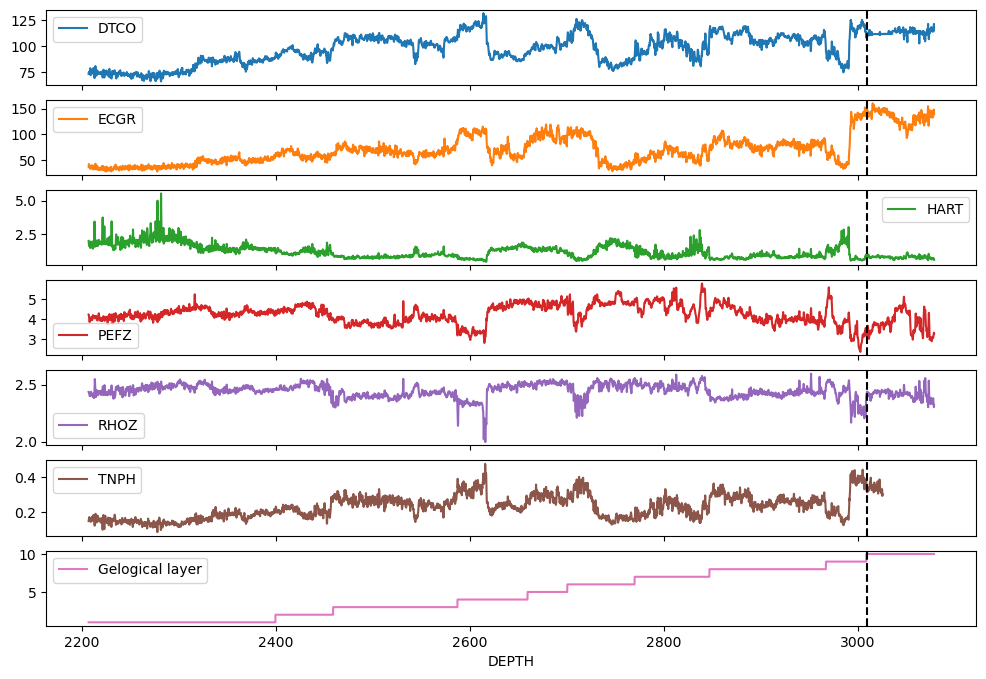

In [77]:
axes = df.plot(x="DEPTH", subplots=True, figsize=(12,8), 
               sharex=True);

# starting point of missing data, in terms of depth
depth_nan = df.iloc[dtco_idx]["DEPTH"].copy()

# vertical line to highlight starting of missing data
for ax in axes: 
    ax.axvline(depth_nan, ls="dashed", color="k")

## What now? 

You can:
* Train other models and compare them (e.g, a random forest regressor).
* Repeat the exercise using TNPH. 

Remember to create new Jupyter notebooks for this!